In [17]:
import pandas as pd

counts = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/SeattleWeather.csv', index_col='DATE', parse_dates=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16600\2338871332.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv', index_col='Date', parse_dates=True)


In [18]:
df_fremont.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [22]:
daily=counts.resample('d').sum()
daily['Total']=daily.sum(axis=1)
daily=daily[['Total']]
daily.head()

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0


In [3]:
df_seattle.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-01,10.51,NaN,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-02,10.07,NaN,NaN,0.43,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-03,5.14,NaN,NaN,0.03,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-04,10.51,NaN,NaN,0.80,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-01-05,13.65,NaN,NaN,0.05,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [23]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily[days[i]]=(daily.index.dayofweek == i).astype(float)

In [24]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal=USFederalHolidayCalendar()
holidays=cal.holidays('2012','2020')
daily=daily.join(pd.Series(1,index=holidays,name='holiday'))
daily['holiday'].fillna(0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16600\4294947504.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0,inplace=True)


In [26]:
def hours_of_daylight(date,axis=23.44, latitude=47.61):
    days=(date-pd.datetime(2000,12,21)).days
    m=(1-np.tan(np.radians(latitude))
    *np.tan(np.radinas(axis)*np.cos(days*2*np.pi/365.25)))
    return 24.*np.degrees(np.arcross(1-np.clip(m,0,2)))/180.
    daily['dayling_hrs']=list(map(hous_of_daylight,daily.index))
    plt.ylim(8,17)

In [29]:
import pandas as pd

counts = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv', index_col='Date', parse_dates=True)


weather = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/SeattleWeather.csv', index_col='DATE', parse_dates=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16600\1626551957.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv', index_col='Date', parse_dates=True)


(8.0, 17.0)

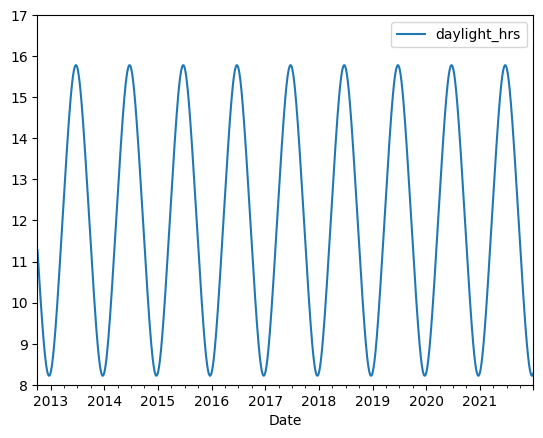

In [28]:
from datetime import datetime

import numpy as np

import matplotlib.pyplot as plt



def hours_of_daylight(date, axis=23.44, latitude=47.61):

    """Compute the hours of daylight for the given date"""

    days = (date - datetime(2000, 12, 21)).days

    m = (1. - np.tan(np.radians(latitude))

         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))

    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.



daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

daily[['daylight_hrs']].plot()

plt.ylim(8, 17)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


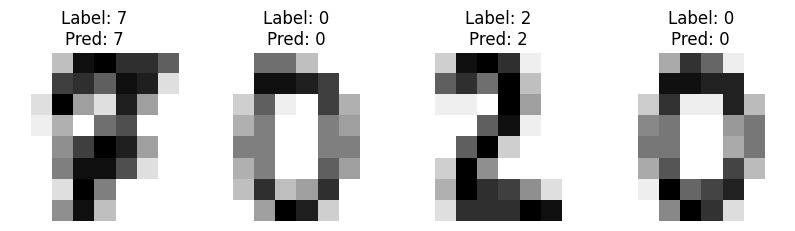

Results for Logistic Regression:
Best score: 0.9703180503923999
Best parameters: {'C': 161.6830798234934, 'penalty': 'l2'}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


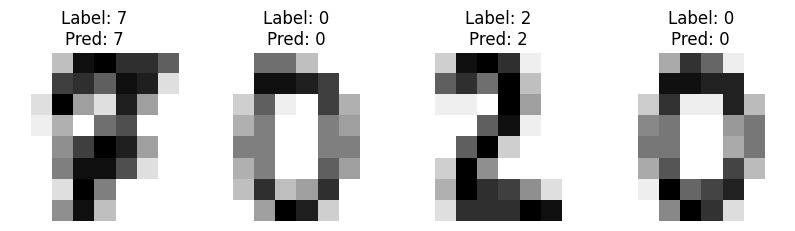

Results for Random Forest:
Best score: 0.9643700950020653
Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 75}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


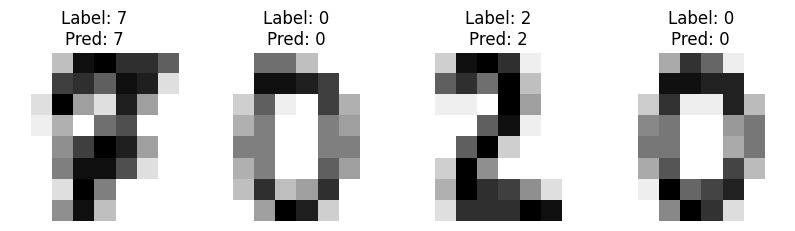

Results for SVM:
Best score: 0.9859011427784662
Best parameters: {'C': 129.22513910323315, 'gamma': 0.0022803035535841187, 'kernel': 'rbf'}
--------------------------------------------------


In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import loguniform, randint
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Define the classifiers and their respective parameter distributions for RandomizedSearchCV
classifiers = {
    'Logistic Regression': LogisticRegression(solver='saga', tol=1e-2, max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

param_distributions = {
    'Logistic Regression': {
        'C': loguniform(1e-4, 1e4),
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': randint(10, 200),
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11)
    },
    'SVM': {
        'C': loguniform(1e-4, 1e4),
        'gamma': loguniform(1e-4, 1e3),
        'kernel': ['linear', 'rbf']
    }
}

# Results dictionary to store the best estimator and its score
results = {}

# Loop through the classifiers
for clf_name, clf in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=param_distributions[clf_name], cv=5, verbose=1)
    random_search.fit(X_train, y_train)
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    results[clf_name] = {'best_score': best_score, 'best_params': best_params}

    # Make predictions with the best estimator
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    # Assuming X_test are the images, y_test are the true labels, and y_pred are the predictions:
    fig, axes = plt.subplots(1, 4, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.set_axis_off()
        ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Label: {y_test[i]}\nPred: {y_pred[i]}')
    plt.show()

    # Print the results for the current classifier
    print(f"Results for {clf_name}:")
    print("Best score:", results[clf_name]['best_score'])
    print("Best parameters:", results[clf_name]['best_params'])
    print("-" * 50)
